In [2]:
# Import dependancies
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
# Import the data
data = Path('data/PLACES__County.csv')
county_df = pd.read_csv(data)
county_df.head(5)

,StateAbbr,StateDesc,CountyName,CountyFIPS,TotalPopulation,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ACCESS2_AdjPrev,ACCESS2_Adj95CI,ARTHRITIS_CrudePrev,...,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,TEETHLOST_AdjPrev,TEETHLOST_Adj95CI,Geolocation
0,NJ,New Jersey,Warren,34041,105267,NaN,NaN,NaN,NaN,NaN,...,"(36.5, 39.8)",NaN,NaN,NaN,NaN,11.4,"( 6.8, 16.8)",11.5,"( 6.9, 17.0)",POINT (-74.9967165 40.85716301)
1,OK,Oklahoma,Jackson,40065,24530,24.0,"(21.0, 27.1)",24.2,"(21.2, 27.3)",23.5,...,"(36.4, 39.0)",3.4,"( 3.1, 3.7)",3.3,"( 3.0, 3.6)",18.6,"(12.7, 25.4)",18.8,"(12.8, 25.5)",POINT (-99.41467445 34.58811786)
2,IL,Illinois,Lawrence,17101,15678,18.6,"(16.0, 21.6)",18.9,"(16.4, 21.9)",27.9,...,"(35.4, 38.3)",3.8,"( 3.4, 4.3)",3.4,"( 3.1, 3.8)",17.1,"(11.4, 23.9)",17.2,"(11.5, 24.1)",POINT (-87.72684251 38.7203392)
3,KS,Kansas,Barton,20009,25779,19.6,"(17.1, 22.2)",20.5,"(17.7, 23.3)",27.7,...,"(32.8, 35.6)",3.8,"( 3.4, 4.2)",3.1,"( 2.8, 3.4)",17.1,"(11.3, 23.5)",17.2,"(11.4, 23.3)",POINT (-98.75632156 38.478934)
4,AK,Alaska,Anchorage,2020,288000,13.6,"(12.0, 15.5)",13.6,"(12.0, 15.5)",19.3,...,"(33.2, 35.5)",2.6,"( 2.4, 2.8)",2.7,"( 2.5, 3.0)",11.7,"( 8.3, 16.0)",12.2,"( 8.6, 16.8)",POINT (-149.1141071 61.1504589)


In [3]:
county_df.dtypes

StateAbbr               object
StateDesc               object
CountyName              object
CountyFIPS               int64
TotalPopulation          int64
                        ...   
TEETHLOST_CrudePrev    float64
TEETHLOST_Crude95CI     object
TEETHLOST_AdjPrev      float64
TEETHLOST_Adj95CI       object
Geolocation             object
Length: 126, dtype: object

In [4]:
# Update FIPS to a string
county_df["CountyFIPS"] = county_df["CountyFIPS"].apply(str)
county_df.dtypes

StateAbbr               object
StateDesc               object
CountyName              object
CountyFIPS              object
TotalPopulation          int64
                        ...   
TEETHLOST_CrudePrev    float64
TEETHLOST_Crude95CI     object
TEETHLOST_AdjPrev      float64
TEETHLOST_Adj95CI       object
Geolocation             object
Length: 126, dtype: object

In [5]:
# Drop confidence interval columns.

for i in county_df.columns:
    if re.search('95', i):
        county_df.pop(i)

county_df.head()

,StateAbbr,StateDesc,CountyName,CountyFIPS,TotalPopulation,ACCESS2_CrudePrev,ACCESS2_AdjPrev,ARTHRITIS_CrudePrev,ARTHRITIS_AdjPrev,BINGE_CrudePrev,...,OBESITY_AdjPrev,PHLTH_CrudePrev,PHLTH_AdjPrev,SLEEP_CrudePrev,SLEEP_AdjPrev,STROKE_CrudePrev,STROKE_AdjPrev,TEETHLOST_CrudePrev,TEETHLOST_AdjPrev,Geolocation
0,NJ,New Jersey,Warren,34041,105267,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.3,38.3,NaN,NaN,11.4,11.5,POINT (-74.9967165 40.85716301)
1,OK,Oklahoma,Jackson,40065,24530,24.0,24.2,23.5,23.0,13.6,...,36.3,13.8,13.8,37.1,37.7,3.4,3.3,18.6,18.8,POINT (-99.41467445 34.58811786)
2,IL,Illinois,Lawrence,17101,15678,18.6,18.9,27.9,25.6,20.4,...,38.8,14.5,13.9,36.1,36.8,3.8,3.4,17.1,17.2,POINT (-87.72684251 38.7203392)
3,KS,Kansas,Barton,20009,25779,19.6,20.5,27.7,23.7,15.4,...,37.0,13.4,12.5,32.9,34.2,3.8,3.1,17.1,17.2,POINT (-98.75632156 38.478934)
4,AK,Alaska,Anchorage,2020,288000,13.6,13.6,19.3,20.0,18.8,...,30.7,10.0,10.1,34.6,34.4,2.6,2.7,11.7,12.2,POINT (-149.1141071 61.1504589)


In [6]:
# Compare adj and crude measures.
county_df[["ACCESS2_AdjPrev","ACCESS2_CrudePrev"]].describe()

,ACCESS2_AdjPrev,ACCESS2_CrudePrev
count,3121.000000,3121.000000
mean,18.373662,17.637872
std,6.839567,6.832941
min,7.900000,7.500000
25%,13.400000,12.700000
50%,16.600000,15.900000
75%,21.200000,20.500000
max,56.600000,55.700000


In [7]:
# drop all the CrudePrev columns

for i in county_df.columns:
    if re.search('CrudePrev', i):
        county_df.pop(i)

county_df.head()

,StateAbbr,StateDesc,CountyName,CountyFIPS,TotalPopulation,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,BINGE_AdjPrev,BPHIGH_AdjPrev,BPMED_AdjPrev,...,KIDNEY_AdjPrev,LPA_AdjPrev,MAMMOUSE_AdjPrev,MHLTH_AdjPrev,OBESITY_AdjPrev,PHLTH_AdjPrev,SLEEP_AdjPrev,STROKE_AdjPrev,TEETHLOST_AdjPrev,Geolocation
0,NJ,New Jersey,Warren,34041,105267,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,72.5,NaN,NaN,NaN,38.3,NaN,11.5,POINT (-74.9967165 40.85716301)
1,OK,Oklahoma,Jackson,40065,24530,24.2,23.0,13.6,34.1,57.9,...,3.1,38.5,71.5,15.0,36.3,13.8,37.7,3.3,18.8,POINT (-99.41467445 34.58811786)
2,IL,Illinois,Lawrence,17101,15678,18.9,25.6,21.5,33.3,56.8,...,2.9,30.3,68.7,15.8,38.8,13.9,36.8,3.4,17.2,POINT (-87.72684251 38.7203392)
3,KS,Kansas,Barton,20009,25779,20.5,23.7,17.1,32.9,56.8,...,2.9,32.1,69.0,15.4,37.0,12.5,34.2,3.1,17.2,POINT (-98.75632156 38.478934)
4,AK,Alaska,Anchorage,2020,288000,13.6,20.0,18.2,29.8,48.5,...,2.5,20.5,67.4,12.4,30.7,10.1,34.4,2.7,12.2,POINT (-149.1141071 61.1504589)


In [8]:
# Extract lat & long for mapping
location_df = county_df[["CountyName", "CountyFIPS", "Geolocation"]]
location_df.head()

,CountyName,CountyFIPS,Geolocation
0,Warren,34041,POINT (-74.9967165 40.85716301)
1,Jackson,40065,POINT (-99.41467445 34.58811786)
2,Lawrence,17101,POINT (-87.72684251 38.7203392)
3,Barton,20009,POINT (-98.75632156 38.478934)
4,Anchorage,2020,POINT (-149.1141071 61.1504589)


In [9]:
point_df = location_df["Geolocation"].str.split(" ", expand=True)
point_df.pop(0)
point_df.head()

,1,2
0,(-74.9967165,40.85716301)
1,(-99.41467445,34.58811786)
2,(-87.72684251,38.7203392)
3,(-98.75632156,38.478934)
4,(-149.1141071,61.1504589)


In [10]:
point_df[1] = point_df[1].str.replace("(", "")
point_df[2] = point_df[2].str.replace(")", "")
point_df.head()

,1,2
0,-74.9967165,40.85716301
1,-99.41467445,34.58811786
2,-87.72684251,38.7203392
3,-98.75632156,38.478934
4,-149.1141071,61.1504589


In [11]:
lat_long_df = pd.merge(location_df, point_df, left_index=True, right_index=True)

In [12]:
lat_long_df.pop("Geolocation")

0        POINT (-74.9967165 40.85716301)
1       POINT (-99.41467445 34.58811786)
2        POINT (-87.72684251 38.7203392)
3         POINT (-98.75632156 38.478934)
4        POINT (-149.1141071 61.1504589)
                      ...               
3137    POINT (-83.04983435 38.31844184)
3138    POINT (-89.99137922 34.87557805)
3139    POINT (-74.15238026 40.58072907)
3140    POINT (-97.64993321 38.78398051)
3141    POINT (-97.65436631 33.21591466)
Name: Geolocation, Length: 3142, dtype: object

In [13]:
lat_long_df.rename(columns={lat_long_df.columns[3]: 'Lat', lat_long_df.columns[2]: 'Lon'},inplace=True)

In [14]:
lat_long_df.dtypes

CountyName    object
CountyFIPS    object
Lon           object
Lat           object
dtype: object

In [15]:
# Drop Additional Columns
columns_to_delete = ["TotalPopulation", "Geolocation"]

#county_df.pop("TotalPopulation")

for i in columns_to_delete:
    county_df.pop(i)

county_df.head()

,StateAbbr,StateDesc,CountyName,CountyFIPS,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,BINGE_AdjPrev,BPHIGH_AdjPrev,BPMED_AdjPrev,CANCER_AdjPrev,...,HIGHCHOL_AdjPrev,KIDNEY_AdjPrev,LPA_AdjPrev,MAMMOUSE_AdjPrev,MHLTH_AdjPrev,OBESITY_AdjPrev,PHLTH_AdjPrev,SLEEP_AdjPrev,STROKE_AdjPrev,TEETHLOST_AdjPrev
0,NJ,New Jersey,Warren,34041,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,72.5,NaN,NaN,NaN,38.3,NaN,11.5
1,OK,Oklahoma,Jackson,40065,24.2,23.0,13.6,34.1,57.9,6.1,...,31.3,3.1,38.5,71.5,15.0,36.3,13.8,37.7,3.3,18.8
2,IL,Illinois,Lawrence,17101,18.9,25.6,21.5,33.3,56.8,6.5,...,29.3,2.9,30.3,68.7,15.8,38.8,13.9,36.8,3.4,17.2
3,KS,Kansas,Barton,20009,20.5,23.7,17.1,32.9,56.8,6.4,...,30.4,2.9,32.1,69.0,15.4,37.0,12.5,34.2,3.1,17.2
4,AK,Alaska,Anchorage,2020,13.6,20.0,18.2,29.8,48.5,6.0,...,27.8,2.5,20.5,67.4,12.4,30.7,10.1,34.4,2.7,12.2


In [16]:
county_df.columns = county_df.columns.str.replace('_AdjPrev', '')
county_df.head()

,StateAbbr,StateDesc,CountyName,CountyFIPS,ACCESS2,ARTHRITIS,BINGE,BPHIGH,BPMED,CANCER,...,HIGHCHOL,KIDNEY,LPA,MAMMOUSE,MHLTH,OBESITY,PHLTH,SLEEP,STROKE,TEETHLOST
0,NJ,New Jersey,Warren,34041,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,72.5,NaN,NaN,NaN,38.3,NaN,11.5
1,OK,Oklahoma,Jackson,40065,24.2,23.0,13.6,34.1,57.9,6.1,...,31.3,3.1,38.5,71.5,15.0,36.3,13.8,37.7,3.3,18.8
2,IL,Illinois,Lawrence,17101,18.9,25.6,21.5,33.3,56.8,6.5,...,29.3,2.9,30.3,68.7,15.8,38.8,13.9,36.8,3.4,17.2
3,KS,Kansas,Barton,20009,20.5,23.7,17.1,32.9,56.8,6.4,...,30.4,2.9,32.1,69.0,15.4,37.0,12.5,34.2,3.1,17.2
4,AK,Alaska,Anchorage,2020,13.6,20.0,18.2,29.8,48.5,6.0,...,27.8,2.5,20.5,67.4,12.4,30.7,10.1,34.4,2.7,12.2


In [17]:
county_df.rename(columns = {'ACCESS2':'ACCESS'}, inplace = True)

In [18]:
# Count NAs
for i in county_df:
    if county_df[i].isna().sum() >0:
        
        print(f'{i} has {county_df[i].isna().sum()} NAs')

ACCESS has 21 NAs
ARTHRITIS has 21 NAs
BINGE has 21 NAs
BPHIGH has 21 NAs
BPMED has 21 NAs
CANCER has 21 NAs
CASTHMA has 21 NAs
CHD has 21 NAs
CHECKUP has 21 NAs
CHOLSCREEN has 21 NAs
COPD has 21 NAs
CSMOKING has 21 NAs
DEPRESSION has 21 NAs
DIABETES has 21 NAs
GHLTH has 21 NAs
HIGHCHOL has 21 NAs
KIDNEY has 21 NAs
LPA has 21 NAs
MHLTH has 21 NAs
OBESITY has 21 NAs
PHLTH has 21 NAs
STROKE has 21 NAs


In [19]:
# Drop NAs
county_df = county_df.dropna()
county_df.shape

(3121, 34)

In [20]:
# Check for duplicates in the County FIPS column
county_df.CountyFIPS.duplicated().count()

3121

In [21]:
# Describe the data
county_df.describe().round()

,ACCESS,ARTHRITIS,BINGE,BPHIGH,BPMED,CANCER,CASTHMA,CERVICAL,CHD,CHECKUP,...,HIGHCHOL,KIDNEY,LPA,MAMMOUSE,MHLTH,OBESITY,PHLTH,SLEEP,STROKE,TEETHLOST
count,3121.0,3121.0,3121.0,3121.0,3121.0,3121.0,3121.0,3121.0,3121.0,3121.0,...,3121.0,3121.0,3121.0,3121.0,3121.0,3121.0,3121.0,3121.0,3121.0,3121.0
mean,18.0,25.0,18.0,33.0,58.0,6.0,10.0,84.0,6.0,74.0,...,30.0,3.0,30.0,71.0,16.0,36.0,14.0,37.0,3.0,17.0
std,7.0,3.0,3.0,5.0,4.0,0.0,1.0,2.0,1.0,4.0,...,2.0,0.0,6.0,4.0,3.0,4.0,3.0,4.0,1.0,5.0
min,8.0,15.0,7.0,21.0,46.0,5.0,7.0,70.0,4.0,60.0,...,21.0,2.0,13.0,54.0,10.0,16.0,7.0,26.0,2.0,4.0
25%,13.0,23.0,16.0,29.0,56.0,6.0,9.0,83.0,6.0,71.0,...,28.0,3.0,27.0,68.0,14.0,33.0,12.0,34.0,3.0,14.0
50%,17.0,25.0,18.0,32.0,58.0,7.0,10.0,84.0,6.0,75.0,...,30.0,3.0,30.0,71.0,16.0,36.0,14.0,37.0,3.0,17.0
75%,21.0,27.0,20.0,36.0,60.0,7.0,10.0,85.0,7.0,77.0,...,31.0,3.0,34.0,74.0,18.0,38.0,16.0,40.0,4.0,21.0
max,57.0,39.0,27.0,53.0,72.0,7.0,14.0,90.0,12.0,83.0,...,37.0,6.0,52.0,82.0,26.0,51.0,27.0,49.0,8.0,48.0


In [22]:
print(county_df.columns)

Index(['StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS', 'ACCESS',
       'ARTHRITIS', 'BINGE', 'BPHIGH', 'BPMED', 'CANCER', 'CASTHMA',
       'CERVICAL', 'CHD', 'CHECKUP', 'CHOLSCREEN', 'COLON_SCREEN', 'COPD',
       'COREM', 'COREW', 'CSMOKING', 'DENTAL', 'DEPRESSION', 'DIABETES',
       'GHLTH', 'HIGHCHOL', 'KIDNEY', 'LPA', 'MAMMOUSE', 'MHLTH', 'OBESITY',
       'PHLTH', 'SLEEP', 'STROKE', 'TEETHLOST'],
      dtype='object')


In [23]:
# Create lists to seperate the measures and county columns

county_info = ['CountyFIPS', 'CountyName', 'StateDesc']
health_outcomes = ['CountyFIPS', 'ARTHRITIS', 'CASTHMA', 'BPHIGH', 'CANCER', 'HIGHCHOL', 'KIDNEY', 'COPD', 'CHD', 'DEPRESSION', 'DIABETES', 'OBESITY', 'TEETHLOST', 'STROKE']
prevention = ['CountyFIPS','ACCESS', 'CHECKUP', 'DENTAL', 'BPMED', 'CHOLSCREEN', 'MAMMOUSE', 'CERVICAL', 'COLON_SCREEN', 'COREM', 'COREW']
health_risk_behaviors = ['CountyFIPS', 'BINGE', 'CSMOKING', 'LPA', 'SLEEP']
health_status = ['CountyFIPS', 'MHLTH', 'PHLTH', 'GHLTH']

In [24]:
# Create the county info dataframe
county_info_df = county_df.filter(county_info, axis = 1)
county_info_df.head(5)

,CountyFIPS,CountyName,StateDesc
1,40065,Jackson,Oklahoma
2,17101,Lawrence,Illinois
3,20009,Barton,Kansas
4,2020,Anchorage,Alaska
5,40137,Stephens,Oklahoma


In [25]:
#Write county_info_df to CSV
county_info_df.to_csv('data/county_info_df.csv', index=False)

In [26]:
# Create the health outcomes dataframe
health_outcomes_df = county_df.filter(health_outcomes, axis = 1)
health_outcomes_df.head(5)

,CountyFIPS,ARTHRITIS,CASTHMA,BPHIGH,CANCER,HIGHCHOL,KIDNEY,COPD,CHD,DEPRESSION,DIABETES,OBESITY,TEETHLOST,STROKE
1,40065,23.0,9.7,34.1,6.1,31.3,3.1,7.1,6.3,21.2,11.8,36.3,18.8,3.3
2,17101,25.6,9.5,33.3,6.5,29.3,2.9,8.0,6.4,21.2,10.7,38.8,17.2,3.4
3,20009,23.7,9.7,32.9,6.4,30.4,2.9,6.7,5.8,19.0,11.0,37.0,17.2,3.1
4,2020,20.0,9.2,29.8,6.0,27.8,2.5,5.0,4.8,17.0,8.3,30.7,12.2,2.7
5,40137,25.7,10.5,36.0,6.6,30.0,3.0,8.4,6.8,23.9,10.5,36.5,20.6,3.5


In [27]:
#Write health_outcomes_df to CSV
health_outcomes_df.to_csv('data/health_outcomes_df.csv', index=False)


In [28]:
# Create the prevention dataframe
prevention_df = county_df.filter(prevention, axis = 1)
prevention_df.head(5)

,CountyFIPS,ACCESS,CHECKUP,DENTAL,BPMED,CHOLSCREEN,MAMMOUSE,CERVICAL,COLON_SCREEN,COREM,COREW
1,40065,24.2,74.1,61.1,57.9,83.8,71.5,83.0,58.7,25.2,23.7
2,17101,18.9,73.4,57.8,56.8,83.0,68.7,82.2,61.2,24.7,20.6
3,20009,20.5,72.6,59.3,56.8,82.1,69.0,82.6,58.4,24.4,22.3
4,2020,13.6,68.8,68.5,48.5,81.2,67.4,84.1,58.4,20.8,25.1
5,40137,20.5,74.5,58.3,57.7,82.8,69.6,82.3,54.6,25.5,27.2


In [29]:
#Write prevention_df to CSV
prevention_df.to_csv('data/prevention_df.csv', index=False)

In [30]:
# Create the health risk behaviors dataframe
health_risk_behaviors_df = county_df.filter(health_risk_behaviors, axis = 1)
health_risk_behaviors_df.head(5)

,CountyFIPS,BINGE,CSMOKING,LPA,SLEEP
1,40065,13.6,17.4,38.5,37.7
2,17101,21.5,21.7,30.3,36.8
3,20009,17.1,18.7,32.1,34.2
4,2020,18.2,15.3,20.5,34.4
5,40137,13.5,21.8,39.1,37.3


In [31]:
#Write health_risk_behaviors_df to CSV
health_risk_behaviors_df.to_csv('data/health_risk_behaviors_df.csv', index=False)

In [32]:
# Create the health status dataframe
health_status_df = county_df.filter(health_status, axis = 1)
health_status_df.head(5)

,CountyFIPS,MHLTH,PHLTH,GHLTH
1,40065,15.0,13.8,22.6
2,17101,15.8,13.9,20.9
3,20009,15.4,12.5,20.0
4,2020,12.4,10.1,15.3
5,40137,16.7,14.6,22.2


In [33]:
#Write health_status_df to CSV
health_status_df.to_csv('data/health_status_df.csv', index=False)

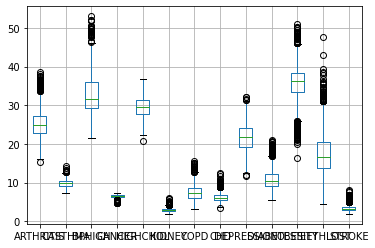

In [34]:
# Visualize Health Outcomes
health_outcomes_df.boxplot()

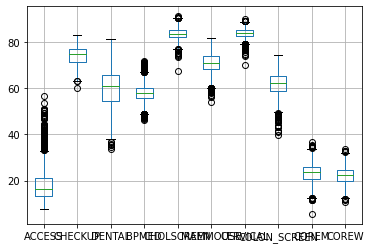

In [35]:
# Visualize Health Prevention
prevention_df.boxplot()

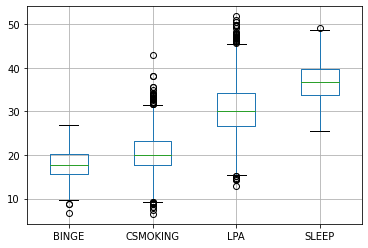

In [36]:
# Visualize Health Risk Behaviors
health_risk_behaviors_df.boxplot()

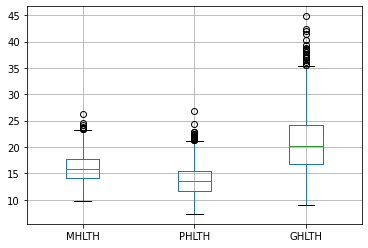

In [37]:
# Visualize Health Status
health_status_df.boxplot()

Adding in the population column 

In [38]:
data = Path('data/census_county_pop.csv')
population_df = pd.read_csv(data, skiprows=[1])
population_df.head(5)

,FIPS,Name of Area,Qualifying Name,Nation,State,County,Census Tract,Block Group,City,Metropolitan Statistical Area/Micropolitan Statistical Area,ZIP Code,Population Density,Population (1/1/2020),Total Population,"Population, Urban","Population, Rural"
0,1001,Autauga,"Autauga, Alabama",0,1,1,NaN,NaN,NaN,NaN,NaN,94.3,56059,56059,32635,23424
1,1003,Baldwin,"Baldwin, Alabama",0,1,3,NaN,NaN,NaN,NaN,NaN,141.8,225463,225463,129911,95552
2,1005,Barbour,"Barbour, Alabama",0,1,5,NaN,NaN,NaN,NaN,NaN,27.8,24575,24575,7921,16654
3,1007,Bibb,"Bibb, Alabama",0,1,7,NaN,NaN,NaN,NaN,NaN,36.0,22427,22427,7072,15355
4,1009,Blount,"Blount, Alabama",0,1,9,NaN,NaN,NaN,NaN,NaN,89.9,57997,57997,5806,52191


In [39]:
# Filter to keep the FIPS and the Population Density

population_df = population_df.filter(['FIPS', 'Population Density', 'Total Population'], axis = 1)
population_df.head(5)


,FIPS,Population Density,Total Population
0,1001,94.3,56059
1,1003,141.8,225463
2,1005,27.8,24575
3,1007,36.0,22427
4,1009,89.9,57997


In [40]:
population_df.shape

(3142, 3)

In [41]:
population_df.dtypes

FIPS                    int64
Population Density    float64
Total Population        int64
dtype: object

In [42]:
# Rename Columns
population_df = population_df.rename(columns={"FIPS": "CountyFIPS", "Population Density": "Density",
                                             "Total Population": "total_population"})
population_df.head()


,CountyFIPS,Density,total_population
0,1001,94.3,56059
1,1003,141.8,225463
2,1005,27.8,24575
3,1007,36.0,22427
4,1009,89.9,57997


In [43]:
#create loop to iterate and define as 'Rural' or 'Urban' for census_df
rural_urban = []
for density in population_df['Density']:
    if density <= 500:
        rural_urban.append("Rural")
    if density > 500:
        rural_urban.append("Urban")

population_df['RuralUrban'] = rural_urban

In [44]:
population_df['RuralUrban'].value_counts()

Rural    2873
Urban     269
Name: RuralUrban, dtype: int64

In [45]:
population_df.head()

,CountyFIPS,Density,total_population,RuralUrban
0,1001,94.3,56059,Rural
1,1003,141.8,225463,Rural
2,1005,27.8,24575,Rural
3,1007,36.0,22427,Rural
4,1009,89.9,57997,Rural


In [46]:
#Write population_df to CSV
population_df.to_csv('data/population_df.csv', index=False)

In [47]:
locations_df = pd.read_csv('data/PLACES__County.csv')
locations_df.head()

StateAbbr   StateDesc CountyName  CountyFIPS  TotalPopulation  \
0        NJ  New Jersey     Warren       34041           105267   
1        OK    Oklahoma    Jackson       40065            24530   
2        IL    Illinois   Lawrence       17101            15678   
3        KS      Kansas     Barton       20009            25779   
4        AK      Alaska  Anchorage        2020           288000   

   ACCESS2_CrudePrev ACCESS2_Crude95CI  ACCESS2_AdjPrev ACCESS2_Adj95CI  \
0                NaN               NaN              NaN             NaN   
1               24.0      (21.0, 27.1)             24.2    (21.2, 27.3)   
2               18.6      (16.0, 21.6)             18.9    (16.4, 21.9)   
3               19.6      (17.1, 22.2)             20.5    (17.7, 23.3)   
4               13.6      (12.0, 15.5)             13.6    (12.0, 15.5)   

   ARTHRITIS_CrudePrev  ... SLEEP_Adj95CI  STROKE_CrudePrev STROKE_Crude95CI  \
0                  NaN  ...  (36.5, 39.8)               NaN              NaN   
1                 23.5  ...  (36.4, 39.0)               3.4     ( 3.1,  3.7)   
2                 27.9  ...  (35.4, 38.3)               3.8     ( 3.4,  4.3)   
3                 27.7  ...  (32.8, 35.6)               3.8     ( 3.4,  4.2)   
4                 19.3  ...  (33.2, 35.5)               2.6     ( 2.4,  2.8)   

   STROKE_AdjPrev STROKE_Adj95CI  TEETHLOST_CrudePrev TEETHLOST_Crude95CI  \
0             NaN            NaN                 11.4        ( 6.8, 16.8)   
1             3.3   ( 3.0,  3.6)                 18.6        (12.7, 25.4)   
2             3.4   ( 3.1,  3.8)                 17.1        (11.4, 23.9)   
3             3.1   ( 2.8,  3.4)                 17.1        (11.3, 23.5)   
4             2.7   ( 2.5,  3.0)                 11.7        ( 8.3, 16.0)   

   TEETHLOST_AdjPrev TEETHLOST_Adj95CI                       Geolocation  
0               11.5      ( 6.9, 17.0)   POINT (-74.9967165 40.85716301)  
1               18.8      (12.8, 25.5)  POINT (-99.41467445 34.58811786)  
2               17.2      (11.5, 24.1)   POINT (-87.72684251 38.7203392)  
3               17.2      (11.4, 23.3)    POINT (-98.75632156 38.478934)  
4               12.2      ( 8.6, 16.8)   POINT (-149.1141071 61.1504589)  

[5 rows x 126 columns]

In [4]:
#seperate out elements in Gelolocation column to create Lattitude and Longitutde columns to visualize data on a map in Plotly
locations_df[['Point', 'Lon', 'Lat']] = locations_df.Geolocation.str.split(" ", expand = True,)
#filter to keep only location relevent columns
locations_df = locations_df.filter(['StateAbbr', 'CountyName',
                                    'CountyFIPS', 'Lat', 'Lon'])
locations_df.head(3)

,StateAbbr,CountyName,CountyFIPS,Lat,Lon
0,NJ,Warren,34041,40.85716301),(-74.9967165
1,OK,Jackson,40065,34.58811786),(-99.41467445
2,IL,Lawrence,17101,38.7203392),(-87.72684251


In [5]:
locations_df['Lat'] = locations_df['Lat'].map(lambda x: x.rstrip(')'))
locations_df['Lon'] = locations_df['Lon'].map(lambda x: x.lstrip('('))
locations_df.head(3)

,StateAbbr,CountyName,CountyFIPS,Lat,Lon
0,NJ,Warren,34041,40.85716301,-74.9967165
1,OK,Jackson,40065,34.58811786,-99.41467445
2,IL,Lawrence,17101,38.7203392,-87.72684251


In [6]:
locations_df['Lat'] = locations_df['Lat'].astype(float)
locations_df['Lon'] = locations_df['Lon'].astype(float)

In [ ]:
#Write locations_df to CSV to upload to AWS & PG
# locations_df.to_csv('data/locations_df.csv', index=False)